In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

columns_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv('housing data.csv', sep = ',', names = columns_name, encoding='ISO-8859-1')

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


En este dataset sobre inmuebles destinados para el habitaje en Boston en los años setenta disponemos de diversas características que pueden afectar a su valor medio de mercado ('MEDV').

Algunas de las columnas hacen referencia a la localización del inmueble, como por ejemplo si se encuentra cerca del río o no ('CHAS'), la distancia a zonas con concentración para ser empleado ('DIS'), la proporción destinada a residencias ('ZN'), así como la destinada a negocios de venta al por mayor, también el índice de accesibilidad a una autopista radial ('RAD') o inclusive la calidad del aire al medir la concentración de óxido nítrico ('NOX').

Por otro lado, también tenemos características socio-económicas, como la cantidad de impuestos asociados al inmueble ('TAX'), el porcentaje de la población con estatus socio-económico bajo ('LSTAT'), el ratio de alumnos por maestro ('PTRATIO'), la proporción de propietarios que todavía habitan el inmueble contruido antes de 1940 ('AGE') o el índice de criminalidad ('CRIM').

Finalmente, también se nos proporciona con detalles sobre el inmueble mismo, como el número de habitaciones habitables ('RM').

En primer lugar procedemos a separar el dataset en dos partes mediante el modelo train_test_split de sklearn:

In [136]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

train, test = train_test_split(df)

print(train.shape, test.shape)

(379, 14) (127, 14)


Obervamos que este modelo realiza una división del dataframe en 'train', con 2/3 del total de registros, y en 'test' el tercio restante.

Acto seguido vemos la descripción de ambas partes:

In [137]:
train.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,3.72,11.52,11.21,0.08,0.56,6.29,68.04,3.81,9.77,412.39,18.59,359.67,12.67,22.61
std,8.97,23.94,6.99,0.27,0.12,0.71,28.39,2.15,8.87,172.91,2.10,86.43,7.32,9.41
min,0.01,0.00,0.74,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.92,5.00
25%,0.08,0.00,5.13,0.00,0.45,5.92,43.00,2.10,4.00,277.00,17.40,376.14,6.91,16.90
50%,0.25,0.00,9.69,0.00,0.54,6.22,77.00,3.15,5.00,334.00,19.10,391.43,11.34,21.40
75%,3.81,12.50,18.10,0.00,0.63,6.63,93.95,5.22,24.00,666.00,20.20,396.24,16.95,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [138]:
test.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00
mean,3.30,10.91,10.91,0.05,0.55,6.26,70.18,3.76,8.91,395.85,18.05,347.74,12.61,22.31
std,7.42,21.47,6.48,0.21,0.11,0.68,27.45,1.99,8.20,154.74,2.30,104.35,6.60,8.58
min,0.01,0.00,0.46,0.00,0.39,4.14,6.60,1.18,1.00,188.00,12.60,2.52,1.73,8.50
25%,0.09,0.00,5.59,0.00,0.45,5.83,52.15,2.09,4.00,293.00,16.50,371.65,7.40,17.15
50%,0.29,0.00,8.56,0.00,0.54,6.17,77.70,3.27,5.00,329.00,18.50,391.45,11.64,20.20
75%,2.20,15.25,18.10,0.00,0.60,6.57,94.20,4.89,8.00,432.00,20.20,395.73,16.87,25.05
max,51.14,90.00,25.65,1.00,0.87,8.72,100.00,9.22,24.00,666.00,21.20,396.90,29.93,50.00


Podemos comprobar que tanto 'train' como 'test' son muy similares.

Todas estas variables, si bien numéricas, son de diferente tipo, por lo que tenemos que proceder de diferente manera según sea más adecuado. Por ejemplo, la columna 'CHAS' es una variable dummy, en la que el valor '1' implica que está junto al río y '0' que no lo está. 

En esta misma línea, podríamos convertir en dummy la columna 'RAD', pues dispone de los siguientes valores únicos:

In [139]:
train['RAD'].unique()

array([24,  4,  5,  8,  3,  2,  6,  1,  7], dtype=int64)

Se trata así de una variable categórica ordinal que nos indica la accesibilidad a una autopista radial, en la que posiblemente '1' sería menor acceso y '24' mayor grado de accesibilidad.

Para comprobarlo, consultamos el valor medio de mercado ('MEDV') asociado al índice de accesibilidad a una autopista ('RAD'):

<Axes: xlabel='RAD', ylabel='MEDV'>

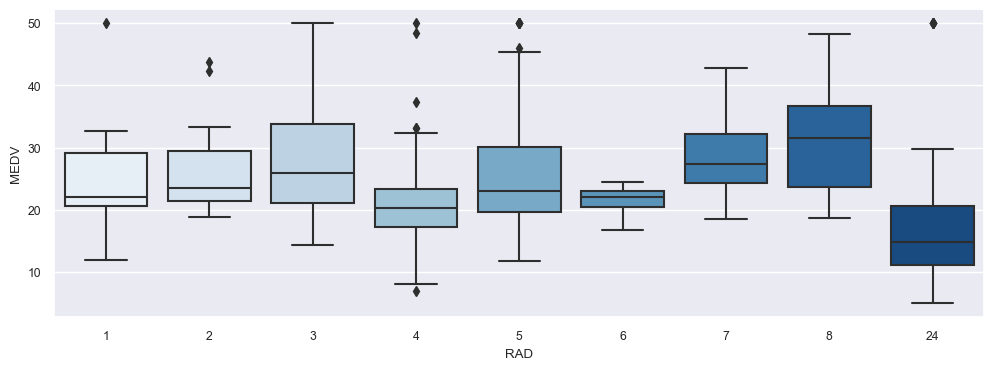

In [140]:
plt.figure(figsize=(12,4))
sns.set(font_scale=0.8)

sns.boxplot(x=train['RAD'], y=train['MEDV'], palette='Blues')

Vemos con claridad que un índice de acceso de '24' está asociado a inmuebles más baratos, por lo que podríamos afirmar con bastante seguridad que un índice de '24' implica más carcanía a la autopista, dado que al haber mala calidad del aire su valor tendría que verse reducido.

Para comprobarlo lo compramos con la concentración de óxido de nitrógeno ('NOX').

<Axes: xlabel='RAD', ylabel='NOX'>

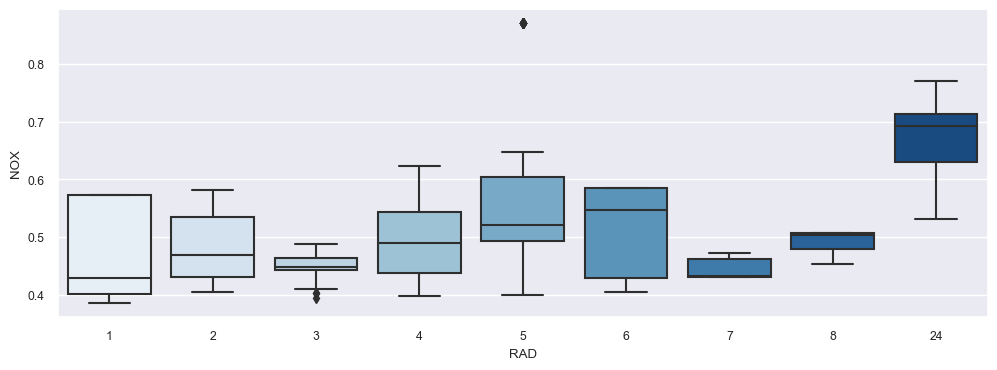

In [141]:
plt.figure(figsize=(12,4))

sns.boxplot(x=train['RAD'], y=train['NOX'], palette='Blues')

Parece ser que sí existe una relación, por lo que podríamos crear a partir de la columna 'RAD' una nueva columna dummy que asocie la accesibilidad a una autopista radial al índice '24' con el valor '1', y, por otro lado, a los índices del '1' al '8' con un '0' su inaccesibilidad a dicha autopista.

In [142]:
train['RAD_DUMMY'] = train['RAD'].apply(lambda x:1 if x == 24 else 0)

In [143]:
train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RAD_DUMMY
374,18.49820,0.0,18.10,0,0.668,4.138,100.0,1.1370,24,666.0,20.2,396.90,37.97,13.8,1
489,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711.0,20.1,344.05,23.97,7.0,0
419,11.81230,0.0,18.10,0,0.718,6.824,76.5,1.7940,24,666.0,20.2,48.45,22.74,8.4,1
37,0.08014,0.0,5.96,0,0.499,5.850,41.5,3.9342,5,279.0,19.2,396.90,8.77,21.0,0
368,4.89822,0.0,18.10,0,0.631,4.970,100.0,1.3325,24,666.0,20.2,375.52,3.26,50.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.76162,20.0,3.97,0,0.647,5.560,62.8,1.9865,5,264.0,13.0,392.40,10.45,22.8,0
86,0.05188,0.0,4.49,0,0.449,6.015,45.1,4.4272,3,247.0,18.5,395.99,12.86,22.5,0
168,2.30040,0.0,19.58,0,0.605,6.319,96.1,2.1000,5,403.0,14.7,297.09,11.10,23.8,0
243,0.12757,30.0,4.93,0,0.428,6.393,7.8,7.0355,6,300.0,16.6,374.71,5.19,23.7,0


Ahora podemos proceder a comparar las variables entre si. Sin embargo, para ello antes tenemos que transformar los datos a una misma magnitud, por lo que con las siguiente representaciones gráficas por cada una de las columnas nos haremos una idea de la información con la que disponemos para así escoger el mejor modelo de transformación de los datos.

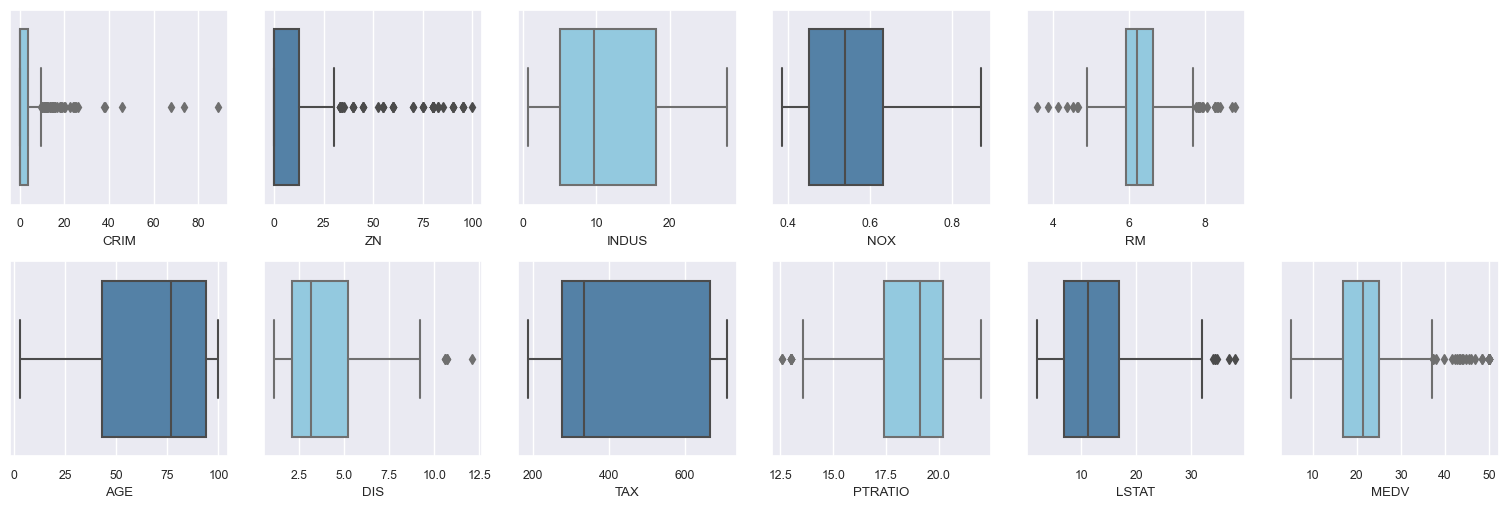

In [144]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(2, 6, 1)
sns.boxplot(x=train['CRIM'], color='skyblue')

ax2 = fig.add_subplot(2, 6, 2)
sns.boxplot(x=train['ZN'], color='steelblue')

ax3 = fig.add_subplot(2, 6, 3)
sns.boxplot(x=train['INDUS'], color='skyblue')

ax4 = fig.add_subplot(2, 6, 4)
sns.boxplot(x=train['NOX'], color='steelblue')

ax5 = fig.add_subplot(2, 6, 5)
sns.boxplot(x=train['RM'], color='skyblue')

ax6 = fig.add_subplot(2, 6, 7)
sns.boxplot(x=train['AGE'], color='steelblue')

ax7 = fig.add_subplot(2, 6, 8)
sns.boxplot(x=train['DIS'], color='skyblue')

ax8 = fig.add_subplot(2, 6, 9)
sns.boxplot(x=train['TAX'], color='steelblue')

ax9 = fig.add_subplot(2, 6, 10)
sns.boxplot(x=train['PTRATIO'], color='skyblue')

ax10 = fig.add_subplot(2, 6, 11)
sns.boxplot(x=train['LSTAT'], color='steelblue')

ax10 = fig.add_subplot(2, 6, 12)
sns.boxplot(x=train['MEDV'], color='skyblue')

plt.tight_layout(pad=0.4, w_pad=2.5, h_pad=1)

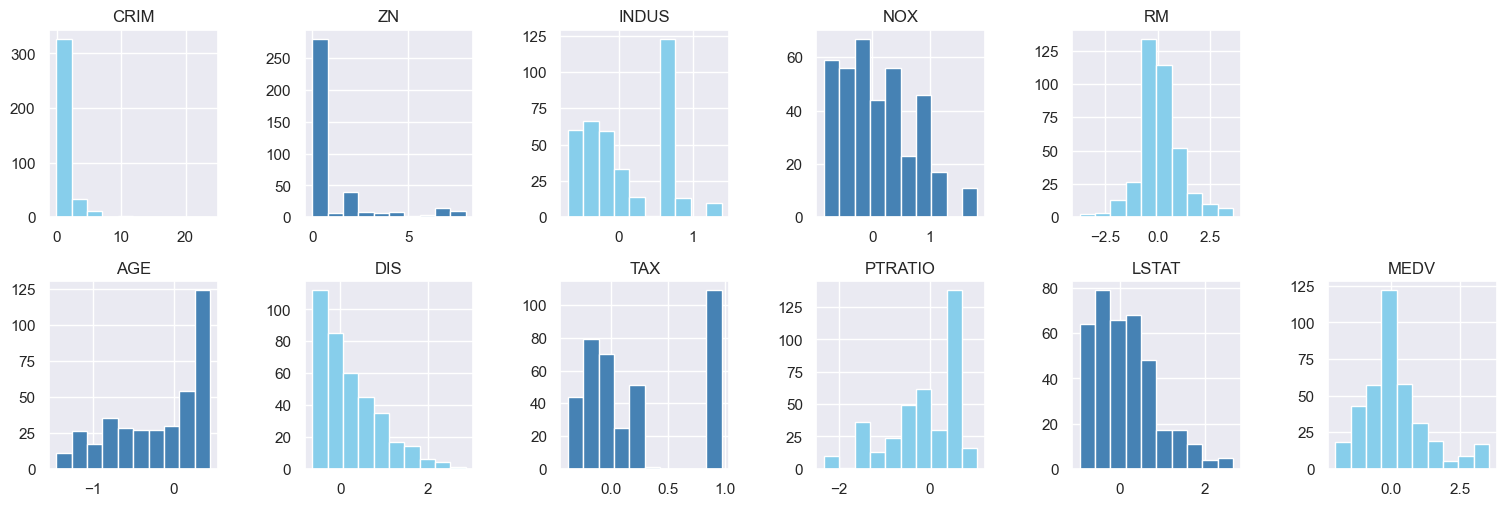

In [149]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(2, 6, 1)
plt.hist(train['CRIM'], color='skyblue')
plt.title('CRIM')

ax2 = fig.add_subplot(2, 6, 2)
plt.hist(train['ZN'], color='steelblue')
plt.title('ZN')

ax3 = fig.add_subplot(2, 6, 3)
plt.hist(train['INDUS'], color='skyblue')
plt.title('INDUS')

ax4 = fig.add_subplot(2, 6, 4)
plt.hist(train['NOX'], color='steelblue')
plt.title('NOX')

ax5 = fig.add_subplot(2, 6, 5)
plt.hist(train['RM'], color='skyblue')
plt.title('RM')

ax6 = fig.add_subplot(2, 6, 7)
plt.hist(train['AGE'], color='steelblue')
plt.title('AGE')

ax7 = fig.add_subplot(2, 6, 8)
plt.hist(train['DIS'], color='skyblue')
plt.title('DIS')

ax8 = fig.add_subplot(2, 6, 9)
plt.hist(train['TAX'], color='steelblue')
plt.title('TAX')

ax9 = fig.add_subplot(2, 6, 10)
plt.hist(train['PTRATIO'], color='skyblue')
plt.title('PTRATIO')

ax10 = fig.add_subplot(2, 6, 11)
plt.hist(train['LSTAT'], color='steelblue')
plt.title('LSTAT')

ax10 = fig.add_subplot(2, 6, 12)
plt.hist(train['MEDV'], color='skyblue')
plt.title('MEDV')

plt.tight_layout(pad=0.4, w_pad=2.5, h_pad=1)

Tras observar el histograma, podemos comprobar que ninguna de las columnas tiene una distribución normal de los datos, así como la representación mediante cajas nos muestra en varias columnas la presencia de outliers.

Por lo tanto, en este caso parece ser que la mejor opción si hemos de aplicar una misma transformación a todo el dataset, entiendo que podría ser el RobustScaler, ya que maneja tanto los outliers como la oblicuidad de la distribución de los datos.

In [146]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

train_scaled = train
col_names = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
features = train_scaled[col_names]

train_scaled[col_names] = scaler.fit_transform(features.values)
train_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RAD_DUMMY
374,4.892610,0.0,0.648419,0,0.714286,-2.924701,0.451423,-0.645412,24,0.853470,0.392857,396.90,2.652390,-0.938272,1
489,-0.018823,0.0,1.391673,0,0.390110,-1.128783,0.418057,-0.447366,4,0.969152,0.357143,344.05,1.257968,-1.777778,0
419,3.099672,0.0,0.648419,0,0.989011,0.855735,-0.009814,-0.435004,24,0.853470,0.392857,48.45,1.135458,-1.604938,1
37,-0.046506,0.0,-0.287587,0,-0.214286,-0.515130,-0.696762,0.250408,5,-0.141388,0.035714,396.90,-0.255976,-0.049383,0
368,1.245544,0.0,0.648419,0,0.510989,-1.753695,0.451423,-0.582802,24,0.853470,0.392857,375.52,-0.804781,3.530864,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.136245,1.6,-0.441018,0,0.598901,-0.923293,-0.278705,-0.373355,5,-0.179949,-2.178571,392.40,-0.088645,0.172840,0
86,-0.054084,0.0,-0.400925,0,-0.489011,-0.282899,-0.626104,0.408295,3,-0.223650,-0.214286,395.99,0.151394,0.135802,0
168,0.548895,0.0,0.762529,0,0.368132,0.144968,0.374877,-0.337006,5,0.177378,-1.571429,297.09,-0.023904,0.296296,0
243,-0.033786,2.4,-0.367001,0,-0.604396,0.249120,-1.358194,1.243619,6,-0.087404,-0.892857,374.71,-0.612550,0.283951,0


Una vez tenemos estas nuevas columnas escaladas procedemos a representarlas gráficamente y estadísticamente.

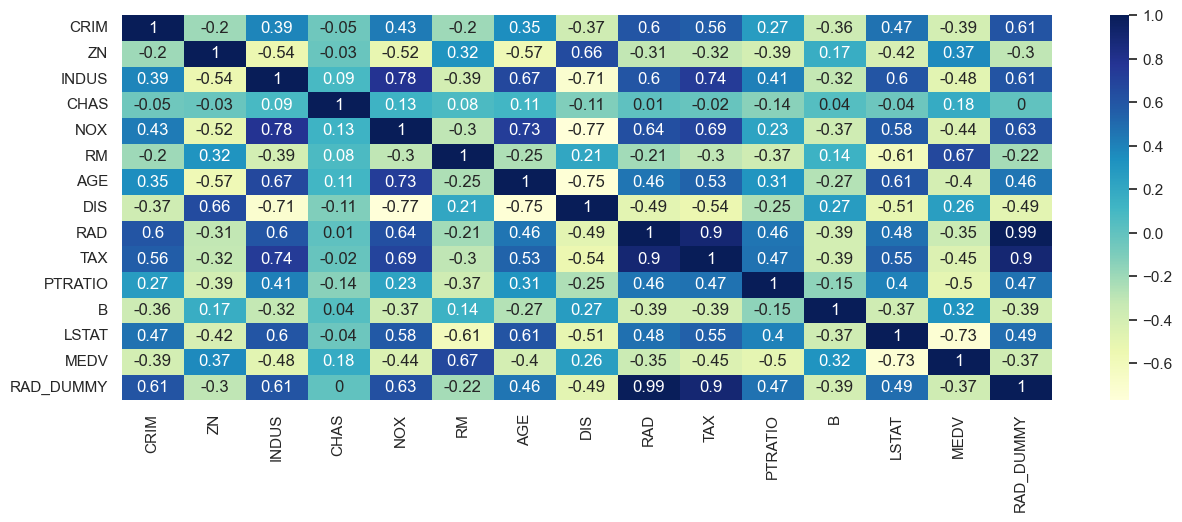

In [147]:
plt.figure(figsize=(15,5))
sns.set(font_scale=1)

corr = train_scaled.corr().round(2)

sns.heatmap(data=corr, annot=True, cmap="YlGnBu")
plt.show()

In [148]:
train_scaled.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RAD_DUMMY
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.93,0.92,0.12,0.08,0.10,0.11,-0.18,0.21,9.77,0.20,-0.18,359.67,0.13,0.15,0.27
std,2.41,1.91,0.54,0.27,0.64,1.00,0.56,0.69,8.87,0.44,0.75,86.43,0.73,1.16,0.45
min,-0.07,0.00,-0.69,0.00,-0.84,-3.74,-1.45,-0.65,1.00,-0.38,-2.32,0.32,-0.94,-2.02,0.00
25%,-0.05,0.00,-0.35,0.00,-0.49,-0.41,-0.67,-0.34,4.00,-0.15,-0.61,376.14,-0.44,-0.56,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,0.00,0.00,391.43,0.00,0.00,0.00
75%,0.95,1.00,0.65,0.00,0.51,0.59,0.33,0.66,24.00,0.85,0.39,396.24,0.56,0.44,1.00
max,23.79,8.00,1.39,1.00,1.83,3.61,0.45,2.87,24.00,0.97,1.04,396.90,2.65,3.53,1.00


Como interpretación de los datos de los que disponemos podemos ver que el valor medio de los inmuebles ('MEDV') está relacionado en mayor medida con el número de habitaciones ('RM') y con el porcentaje de la población con estus socio-económico bajo ('LSTAT'), por lo que estas variables podrían servirnos para estimar el valor de nuevos inmuebles.